In [1]:
! pip install SimpleITK tensorflow

     |████████████████████████████████| 48.4 MB 21.8 MB/s            
     |████████████████████████████████| 458.3 MB 13 kB/s               
     |████████████████████████████████| 65 kB 6.6 MB/s             
     |████████████████████████████████| 42 kB 1.8 MB/s             
  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 5.6 MB 25.9 MB/s            
     |████████████████████████████████| 462 kB 81.3 MB/s            
     |████████████████████████████████| 1.3 MB 67.6 MB/s            
     |████████████████████████████████| 4.4 MB 50.3 MB/s            
     |████████████████████████████████| 132 kB 80.8 MB/s            
  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 4.9 MB 25.1 MB/s            
     |████████████████████████████████| 781 kB 68.4 MB/s            
     |████████████████████████████████| 97 kB 2.0 MB/s             
     |████████████████████████████████| 152 kB 81.0 MB/s            
     |██████████████

In [1]:
import SimpleITK as sitk
import shutil
import subprocess
import time
from matplotlib import pyplot as plt
import numpy as np
import copy
import tensorflow as tf

In [2]:
def myshow(img, title=None, margin=0.05, dpi=80):
    nda = sitk.GetArrayViewFromImage(img)
    spacing = img.GetSpacing()
        
    ysize = nda.shape[0]
    xsize = nda.shape[1]
      
    figsize = (1 + margin) * ysize / dpi, (1 + margin) * xsize / dpi

    fig = plt.figure(title, figsize=figsize, dpi=dpi)
    ax = fig.add_axes([margin, margin, 1 - 2*margin, 1 - 2*margin])
    
    extent = (0, xsize*spacing[1], 0, ysize*spacing[0])
    
    t = ax.imshow(nda,
            extent=extent,
            interpolation='hamming',
            cmap='gray',
            origin='lower')
    
    if(title):
        plt.title(title)

In [3]:
def read_dicom(path):
    grid = sitk.GridSource(outputPixelType=sitk.sitkUInt16,
    size=(50, 50),
    sigma=(0.5, 0.5),
    gridSpacing=(5.0, 5.0),
    gridOffset=(0.0, 0.0),
    spacing=(0.2,0.2))

    reader = sitk.ImageSeriesReader()

    dicom_names = reader.GetGDCMSeriesFileNames(path)
    reader.SetFileNames(dicom_names)

    image = reader.Execute()
    print(f'image_size:{image.GetSize()}')
    myshow(image[:,:,0], 'Grid Input')

    arr = copy.deepcopy(sitk.GetArrayViewFromImage(image))
    print(f'arr_shape:{arr.shape}')
    
    return arr

image_size:(512, 512, 350)
arr_shape:(350, 512, 512)


array([[[-1024., -1024., -1024., ..., -1024., -1024., -1024.],
        [-1024., -1024., -1024., ..., -1024., -1024., -1024.],
        [-1024., -1024., -1024., ..., -1024., -1024., -1024.],
        ...,
        [-1024., -1024., -1024., ..., -1024., -1024., -1024.],
        [-1024., -1024., -1024., ..., -1024., -1024., -1024.],
        [-1024., -1024., -1024., ..., -1024., -1024., -1024.]],

       [[-1024., -1024., -1024., ..., -1024., -1024., -1024.],
        [-1024., -1024., -1024., ..., -1024., -1024., -1024.],
        [-1024., -1024., -1024., ..., -1024., -1024., -1024.],
        ...,
        [-1024., -1024., -1024., ..., -1024., -1024., -1024.],
        [-1024., -1024., -1024., ..., -1024., -1024., -1024.],
        [-1024., -1024., -1024., ..., -1024., -1024., -1024.]],

       [[-1024., -1024., -1024., ..., -1024., -1024., -1024.],
        [-1024., -1024., -1024., ..., -1024., -1024., -1024.],
        [-1024., -1024., -1024., ..., -1024., -1024., -1024.],
        ...,
        [-10

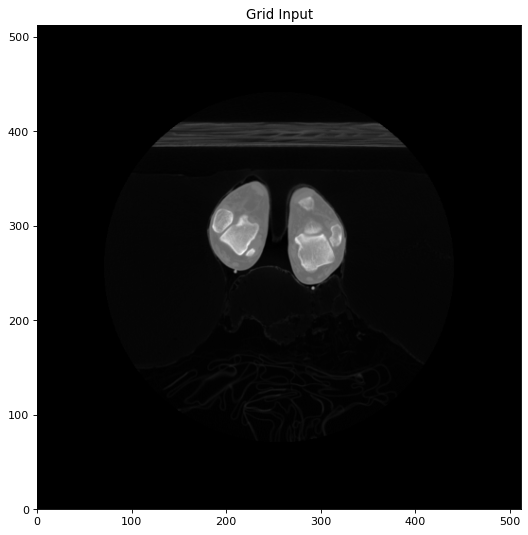

In [4]:
original_knee_arr = read_dicom('efs/Dataset_Assignment4/CT_Knee')
original_knee_arr = original_knee_arr.astype(np.float32)
original_knee_arr

image_size:(512, 512, 150)
arr_shape:(150, 512, 512)


array([[[-1024., -1024., -1024., ..., -1024., -1024., -1024.],
        [-1024., -1024., -1024., ..., -1024., -1024., -1024.],
        [-1024., -1024., -1024., ..., -1024., -1024., -1024.],
        ...,
        [-1024., -1024., -1024., ..., -1024., -1024., -1024.],
        [-1024., -1024., -1024., ..., -1024., -1024., -1024.],
        [-1024., -1024., -1024., ..., -1024., -1024., -1024.]],

       [[-1024., -1024., -1024., ..., -1024., -1024., -1024.],
        [-1024., -1024., -1024., ..., -1024., -1024., -1024.],
        [-1024., -1024., -1024., ..., -1024., -1024., -1024.],
        ...,
        [-1024., -1024., -1024., ..., -1024., -1024., -1024.],
        [-1024., -1024., -1024., ..., -1024., -1024., -1024.],
        [-1024., -1024., -1024., ..., -1024., -1024., -1024.]],

       [[-1024., -1024., -1024., ..., -1024., -1024., -1024.],
        [-1024., -1024., -1024., ..., -1024., -1024., -1024.],
        [-1024., -1024., -1024., ..., -1024., -1024., -1024.],
        ...,
        [-10

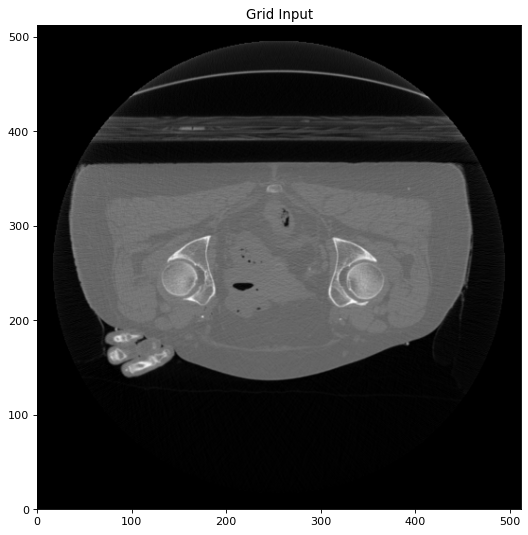

In [5]:
original_pelvis_arr = read_dicom('efs/Dataset_Assignment4/CT_Pelvis')
original_pelvis_arr = original_pelvis_arr.astype(np.float32)
original_pelvis_arr

In [6]:
def add_noise(path):
    grid = sitk.GridSource(outputPixelType=sitk.sitkUInt16,
    size=(50, 50),
    sigma=(0.5, 0.5),
    gridSpacing=(5.0, 5.0),
    gridOffset=(0.0, 0.0),
    spacing=(0.2,0.2))

    reader = sitk.ImageSeriesReader()

    dicom_names = reader.GetGDCMSeriesFileNames(path)
    reader.SetFileNames(dicom_names)

    image = reader.Execute()

#     gaussian_knee_image = sitk.DiscreteGaussian(image)
    gaussian = sitk.SmoothingRecursiveGaussianImageFilter()
    gaussian.SetSigma(2.5)
    image = gaussian.Execute(image)

    print(f'image_size:{image.GetSize()}')
    myshow(image[:,:,0], 'Grid Input')

    arr = copy.deepcopy(sitk.GetArrayViewFromImage(image))
    return arr

image_size:(512, 512, 350)


array([[[-1024., -1024., -1024., ..., -1024., -1024., -1024.],
        [-1024., -1024., -1024., ..., -1024., -1024., -1024.],
        [-1024., -1024., -1024., ..., -1024., -1024., -1024.],
        ...,
        [-1024., -1024., -1024., ..., -1024., -1024., -1024.],
        [-1024., -1024., -1024., ..., -1024., -1024., -1024.],
        [-1024., -1024., -1024., ..., -1024., -1024., -1024.]],

       [[-1024., -1024., -1024., ..., -1024., -1024., -1024.],
        [-1024., -1024., -1024., ..., -1024., -1024., -1024.],
        [-1024., -1024., -1024., ..., -1024., -1024., -1024.],
        ...,
        [-1024., -1024., -1024., ..., -1024., -1024., -1024.],
        [-1024., -1024., -1024., ..., -1024., -1024., -1024.],
        [-1024., -1024., -1024., ..., -1024., -1024., -1024.]],

       [[-1024., -1024., -1024., ..., -1024., -1024., -1024.],
        [-1024., -1024., -1024., ..., -1024., -1024., -1024.],
        [-1024., -1024., -1024., ..., -1024., -1024., -1024.],
        ...,
        [-10

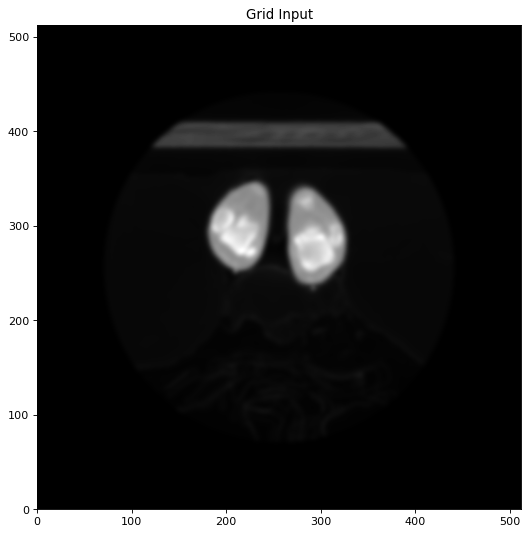

In [7]:
gaussian_knee_arr = add_noise('efs/Dataset_Assignment4/CT_Knee')
gaussian_knee_arr = gaussian_knee_arr.astype(np.float32)
gaussian_knee_arr

image_size:(512, 512, 150)


array([[[-1024., -1024., -1024., ..., -1024., -1024., -1024.],
        [-1024., -1024., -1024., ..., -1024., -1024., -1024.],
        [-1024., -1024., -1024., ..., -1024., -1024., -1024.],
        ...,
        [-1024., -1024., -1024., ..., -1024., -1024., -1024.],
        [-1024., -1024., -1024., ..., -1024., -1024., -1024.],
        [-1024., -1024., -1024., ..., -1024., -1024., -1024.]],

       [[-1024., -1024., -1024., ..., -1024., -1024., -1024.],
        [-1024., -1024., -1024., ..., -1024., -1024., -1024.],
        [-1024., -1024., -1024., ..., -1024., -1024., -1024.],
        ...,
        [-1024., -1024., -1024., ..., -1024., -1024., -1024.],
        [-1024., -1024., -1024., ..., -1024., -1024., -1024.],
        [-1024., -1024., -1024., ..., -1024., -1024., -1024.]],

       [[-1024., -1024., -1024., ..., -1024., -1024., -1024.],
        [-1024., -1024., -1024., ..., -1024., -1024., -1024.],
        [-1024., -1024., -1024., ..., -1024., -1024., -1024.],
        ...,
        [-10

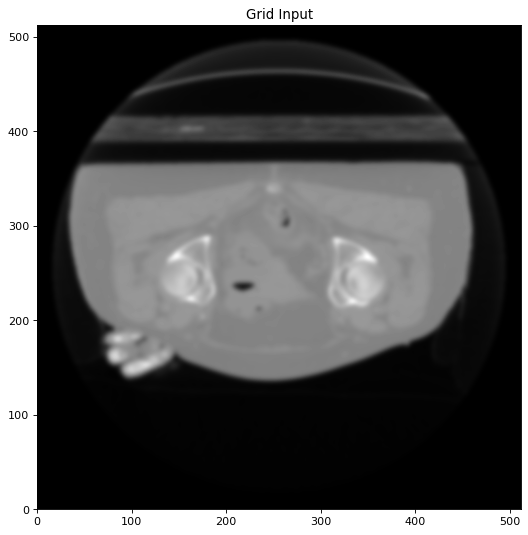

In [8]:
gaussian_pelvis_arr = add_noise('efs/Dataset_Assignment4/CT_Pelvis')
gaussian_pelvis_arr = gaussian_pelvis_arr.astype(np.float32)
gaussian_pelvis_arr

In [9]:
original_knee_arr = (original_knee_arr)/1024.0
gaussian_knee_arr = gaussian_knee_arr/1024.0
original_pelvis_arr = original_pelvis_arr/1024.0
gaussian_pelvis_arr = gaussian_pelvis_arr/1024.0

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
knee_X_train, knee_X_test, knee_y_train, knee_y_test = train_test_split(gaussian_knee_arr, original_knee_arr, test_size=0.33, random_state=42)

In [12]:
pelvis_X_train, pelvis_X_test, pelvis_y_train, pelvis_y_test = train_test_split(gaussian_pelvis_arr, original_pelvis_arr, test_size=0.33, random_state=42)

In [13]:
del original_knee_arr
del gaussian_knee_arr
del original_pelvis_arr
del gaussian_pelvis_arr

In [14]:
X_train = np.append(knee_X_train, pelvis_X_train, axis=0)
X_train.shape

(334, 512, 512)

In [15]:
X_test = np.append(knee_X_test, pelvis_X_test, axis=0)
X_test.shape

(166, 512, 512)

In [16]:
y_train = np.append(knee_y_train, pelvis_y_train, axis=0)
y_train.shape

(334, 512, 512)

In [17]:
y_test = np.append(knee_y_test, pelvis_y_test, axis=0)
y_test.shape

(166, 512, 512)

In [18]:
del knee_X_train, knee_X_test, knee_y_train, knee_y_test

In [19]:
del pelvis_X_train, pelvis_X_test, pelvis_y_train, pelvis_y_test

In [20]:
X_train = X_train[:,:,:,np.newaxis]
X_test = X_test[:,:,:,np.newaxis]
y_train = y_train[:,:,:,np.newaxis]
y_test = y_test[:,:,:,np.newaxis]

In [48]:
from tensorflow.keras.layers import Conv2DTranspose, Conv2D, Input
autoencoder = tf.keras.Sequential([ 
        Input(shape=(512,512,1)), 
        Conv2D(16, (3,3), activation='relu', padding='same', strides=2), 
#         Conv2D(8, (3,3), activation='relu', padding='same', strides=2), 
#         Conv2DTranspose(8, kernel_size=3, strides=2, activation='relu', padding='same'), 
#         Conv2DTranspose(16, kernel_size=3, strides=8, activation='relu', padding='same'), 
        Conv2DTranspose(1, kernel_size=3, activation='sigmoid', padding='same', strides=2)])

In [49]:
autoencoder.compile(optimizer='adam', loss='mse')

In [50]:
autoencoder.fit(X_train, y_train, epochs=10)

Epoch 1/10
11/11 [==============================] - 12s 1s/step - loss: 1.7577
Epoch 2/10
11/11 [==============================] - 11s 1s/step - loss: 1.6545
Epoch 3/10
11/11 [==============================] - 11s 1s/step - loss: 1.5539
Epoch 4/10
11/11 [==============================] - 11s 996ms/step - loss: 1.4425
Epoch 5/10
11/11 [==============================] - 11s 993ms/step - loss: 1.3245
Epoch 6/10
11/11 [==============================] - 11s 999ms/step - loss: 1.2095
Epoch 7/10
11/11 [==============================] - 11s 998ms/step - loss: 1.1099
Epoch 8/10
11/11 [==============================] - 11s 996ms/step - loss: 1.0293
Epoch 9/10
11/11 [==============================] - 11s 998ms/step - loss: 0.9695
Epoch 10/10
11/11 [==============================] - 11s 992ms/step - loss: 0.9280


In [51]:
autoencoder.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 256, 256, 16)      160       
_________________________________________________________________
conv2d_transpose_4 (Conv2DTr (None, 512, 512, 1)       145       
Total params: 305
Trainable params: 305
Non-trainable params: 0
_________________________________________________________________


In [45]:
y_pred = autoencoder.predict(X_test)

In [32]:
y_pred.shape

(166, 512, 512, 1)

In [28]:
y_test.shape

(166, 512, 512, 1)

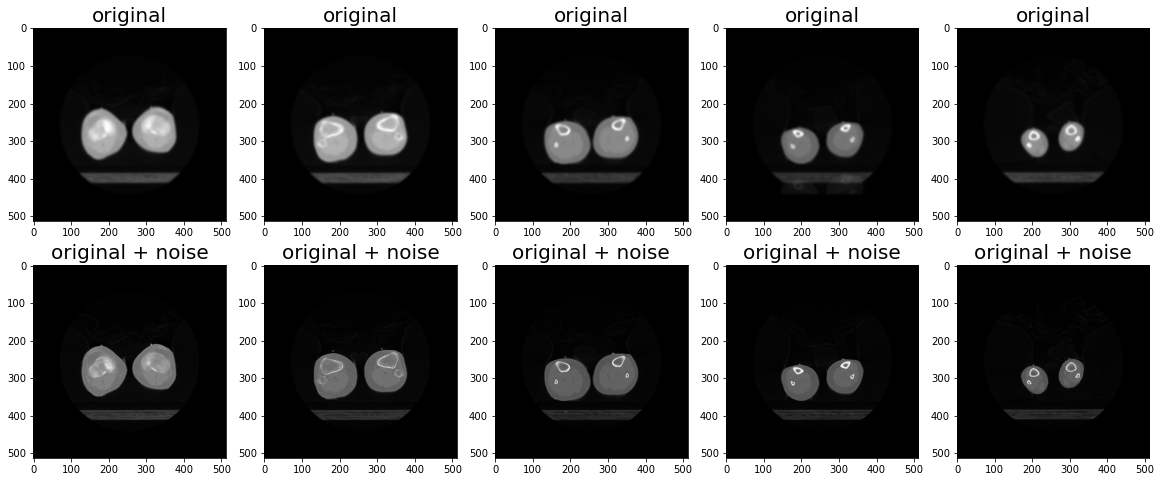

In [34]:
n = 5
plt.figure(figsize=(20, 8))
plt.gray()
for i in range(n):
  ax = plt.subplot(2, n, i + 1) 
  plt.title("original", size=20) 
  plt.imshow(tf.squeeze(X_train[i])) 
  plt.gray() 
  bx = plt.subplot(2, n, n+ i + 1) 
  plt.title("original + noise", size=20) 
  plt.imshow(tf.squeeze(y_train[i])) 
plt.show()

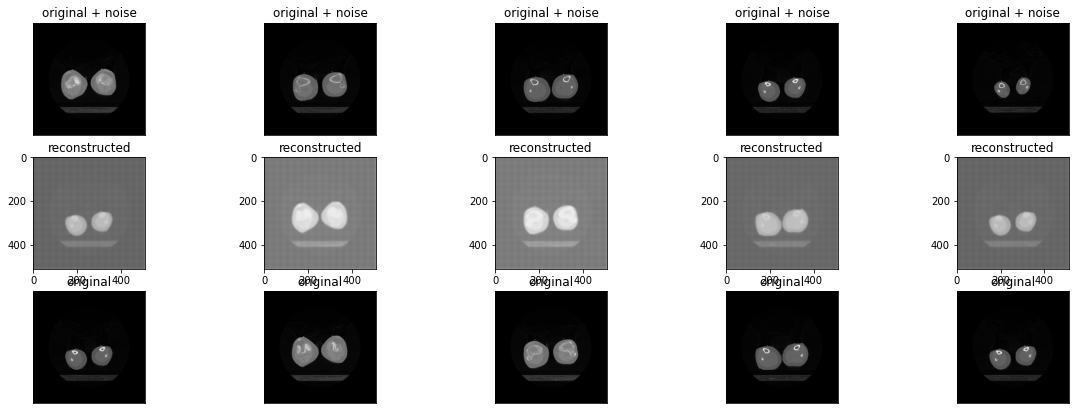

In [52]:
n = 5 
plt.figure(figsize=(20, 7))
plt.gray()
for i in range(n): 
  # display original + noise 
  bx = plt.subplot(3, n, i + 1) 
  plt.title("original + noise") 
  plt.imshow(tf.squeeze(y_train[i])) 
  ax.get_xaxis().set_visible(False) 
  ax.get_yaxis().set_visible(False) 
  
  # display reconstruction 
  cx = plt.subplot(3, n, i + n + 1) 
  plt.title("reconstructed") 
  plt.imshow(tf.squeeze(y_pred[i])) 
  bx.get_xaxis().set_visible(False) 
  bx.get_yaxis().set_visible(False) 
  
  # display original 
  ax = plt.subplot(3, n, i + 2*n + 1) 
  plt.title("original") 
  plt.imshow(tf.squeeze(y_test[i])) 
  ax.get_xaxis().set_visible(False) 
  ax.get_yaxis().set_visible(False) 
